In [98]:
import pandas as pd
record=pd.read_csv("dronedata.txt",header=None,sep='\s+')
record.columns=['x','y','z','t']
record.head()

,x,y,z,t
0,2.00,0.00,1.00,1
1,1.08,1.68,2.38,2
2,-0.83,1.82,2.49,3
3,-1.97,0.28,2.15,4
4,-1.31,-1.51,2.59,5


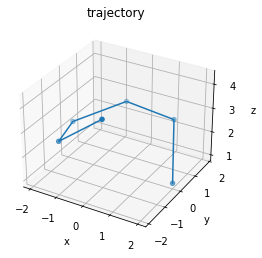

In [99]:
import matplotlib.pyplot as plt
px=record['x'].values.T
py=record['y'].values.T
pz=record['z'].values.T
pt=record['t'].values.T
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(px, py, pz)
# //ax.scatter(*points.T[0], color = 'yellow')
ax.scatter(record[['x']].values.T, record['y'].values.T, record['z'].values.T)
ax.set_xlabel ("x")
ax.set_ylabel ("y")
ax.set_zlabel ("z")
ax.set_title("trajectory")
plt.show()

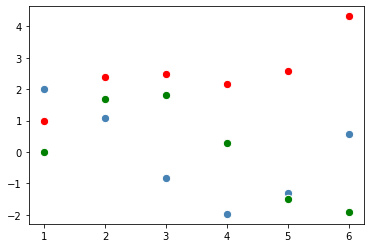

In [100]:
plt.scatter(record[['t']].values, record[['x']].values, c='steelblue', edgecolor='white', s=70)
plt.scatter(record[['t']].values, record[['y']].values, c='green', edgecolor='white', s=70)
plt.scatter(record[['t']].values, record[['z']].values, c='red', edgecolor='white', s=70)

<function matplotlib.pyplot.show(close=None, block=None)>

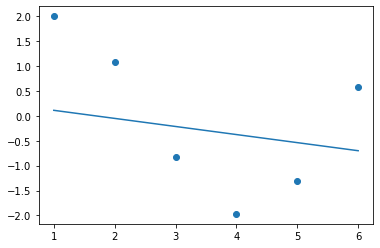

In [101]:
import math
import numpy as np
w=np.zeros(1)
b=np.zeros(1)
cost=[]
ite=0
eta=0.01
for i in range(20):
    estm=np.dot(record[['t']].values,w)+b
    errors=px-estm
    w+=eta*pt.dot(errors)
    b+=eta*errors.sum()
    cost_temp=math.sqrt((errors**2).sum())
    cost.append(cost_temp)
    if(cost_temp<0.1):
        break
    ite=i
plt.scatter(record[['t']].values,px)
plt.plot(record[['t']].values,np.dot(record[['t']].values,w)+b)
plt.show

In [102]:
w,b

(array([-0.1622435]), array([0.27286345]))

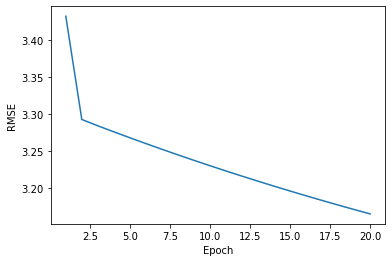

In [103]:
plt.plot(range(1, ite+2), cost)
plt.ylabel('RMSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [137]:
a0=np.zeros(1)
a1=np.zeros(1)
a2=np.zeros(1)
# record[['t']].values
# estm=np.dot(record[['t']].values,a1)+a0
# estm
# errors=px-estm
# errors
# cost_temp2=math.sqrt((errors**2).sum())
# cost_temp2
# a2+=eta*((px).dot(errors))
# a2
# pt2=pt**2
# pt2
dta1=np.dot(record[['t']].values,a1)
dta1
dt2a1=np.dot(record[['t']].values**2,a1)
dt2a1
estm=np.dot(record[['t']].values**2,a1)+np.dot(record[['t']].values,a1)+a0
errors=px-estm
errors
pt2=pt**2
a0+=eta*errors.sum()
a1+=eta*(pt.dot(errors))
a2+=eta*((pt2).dot(errors))
estm=np.dot(record[['t']].values**2,a1)+np.dot(record[['t']].values,a1)+a0
errors=px-estm
errors

array([ 2.1914,  1.645 ,  0.2954, -0.0974,  1.4966,  4.4974])

In [138]:
for i in range(20):
    estm=np.dot(record[['t']].values**2,a1)+np.dot(record[['t']].values,a1)+a0
    errors=px-estm
    pt2=pt**2
    a0+=-2*6*(eta*errors.sum())
    a1+=-2*6*(eta*(pt.dot(errors)))
    a2+=-2*6*(eta*((pt2).dot(errors)))
    cost_temp2=math.sqrt((errors**2).sum())
    cost.append(cost_temp2)
    if(cost_temp2<0.1):
        break
    ite=i

In [139]:
a0,a1,a2

(array([-3.23902368e+34]), array([-1.5340077e+35]), array([-7.82172496e+35]))

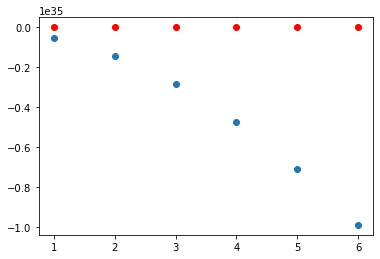

In [141]:
plt.scatter(record[['t']].values,estm)
plt.scatter(record[['t']].values,px,c='red')
plt.show()